In [8]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import csv


In [338]:
# Load in csv dataset
df = pd.read_csv('data/spam.csv',delimiter=',',encoding='latin-1')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [339]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

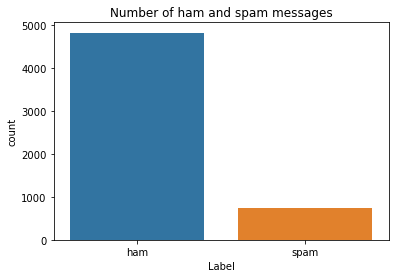

In [80]:
# See output distribution
sns.countplot(x=df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [340]:
# Get input and outputs
X = df.v2 #.iloc[:300]
Y = df.v1 #.iloc[:300]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)
#,Y_train,Y_test = 
# print(len(X_train))
# print(len(Y_train))
# print(len(Y_test))
# print(len(Y_test)/(len(Y_train)+len(Y_test)))

In [102]:
maxLen = len(max(X_train, key=lambda x: len(x.split())).split())
maxLen

29

In [89]:
# Functions taken from emo_utils.py
def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

def convert_to_one_hot(Y, C):
    print('Y.reshape(-1)',Y.reshape(-1))
    print('C',C)
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

def read_csv(filename = 'data/emojify_data.csv'):
    phrase = []
    emoji = []

    with open (filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)

        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)

    return X[:10], Y[:10]

In [130]:
# Load OG Data
X_train, Y_train = read_csv('og_data/train_emoji.csv')
X_test, Y_test = read_csv('og_data/tesss.csv')

In [47]:
maxLen = len(max(X_train, key=lambda x: len(x.split())).split())
maxLen

8

In [12]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

In [ ]:
Y_train_NP = np.array(Y_train)
Y_test_NP = np.array(Y_test)

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(Y_train_NP)
print(np.unique(vec))
print(np.unique(Y_train_NP))

# Y_oh_train = pd.get_dummies(Y_train)
# Y_oh_test = pd.get_dummies(Y_test)
# Y_oh_train_np = np.array(Y_oh_train)

# Stopped here TODO convert Y_train, Y_test to one_hot encodings. This is a binary classification problem.
# Y_oh_train = convert_to_one_hot(Y_train, C = 2)
# Y_oh_test = convert_to_one_hot(Y_test, C = 2)

In [59]:
def sentence_to_avg(sentence, word_to_vec_map):
    """
    Converts a sentence (string) into a list of words (strings). Extracts the GloVe representation of each word
    and averages its value into a single vector encoding the meaning of the sentence.
    
    Arguments:
    sentence -- string, one training example from X
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    
    Returns:
    avg -- average vector encoding information about the sentence, numpy-array of shape (J,), where J can be any number
    """
    # Get a valid word contained in the word_to_vec_map. 
    any_word = next(iter(word_to_vec_map.keys()))
    
    ### START CODE HERE ###
    # Step 1: Split sentence into list of lower case words (≈ 1 line)
    # TODO remove [:5] keeping input to only 5 words now
    words = sentence.lower().split() #[:5]

    # Initialize the average word vector, should have the same shape as your word vectors.
    # Use `np.zeros` and pass in the argument of any word's word 2 vec's shape
    avg = np.zeros(word_to_vec_map[any_word].shape)
    
    # Initialize count to 0
    count = 0
    
    # Step 2: average the word vectors. You can loop over the words in the list "words".
    for w in words:
        # Check that word exists in word_to_vec_map
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
            # Increment count
            count +=1
          
    if count > 0:
        # Get the average. But only if count > 0
        avg = avg/count
#     print('avg',avg)
    
    ### END CODE HERE ###
    return avg

In [15]:
### YOU CANNOT EDIT THIS CELL

# BEGIN UNIT TEST
avg = sentence_to_avg("Morrocan couscous is my favorite dish", word_to_vec_map)
print("avg = \n", avg)

def sentence_to_avg_test(target):
    # Create a controlled word to vec map
    word_to_vec_map = {'a': [3, 3], 'synonym_of_a': [3, 3], 'a_nw': [2, 4], 'a_s': [3, 2], 
                       'c': [-2, 1], 'c_n': [-2, 2],'c_ne': [-1, 2], 'c_e': [-1, 1], 'c_se': [-1, 0], 
                       'c_s': [-2, 0], 'c_sw': [-3, 0], 'c_w': [-3, 1], 'c_nw': [-3, 2]
                      }
    # Convert lists to np.arrays
    for key in word_to_vec_map.keys():
        word_to_vec_map[key] = np.array(word_to_vec_map[key])
        
    avg = target("a a_nw c_w a_s", word_to_vec_map)
    assert tuple(avg.shape) == tuple(word_to_vec_map['a'].shape),  "Check the shape of your avg array"  
    assert np.allclose(avg, [1.25, 2.5]),  "Check that you are finding the 4 words"
    avg = target("love a a_nw c_w a_s", word_to_vec_map)
    assert np.allclose(avg, [1.25, 2.5]), "Divide by count, not len(words)"
    avg = target("love", word_to_vec_map)
    assert np.array_equal(avg, [0, 0]), "Average of no words must give an array of zeros"
    avg = target("c_se foo a a_nw c_w a_s deeplearning c_nw", word_to_vec_map)
    assert np.allclose(avg, [0.1666667, 2.0]), "Debug the last example"
    
    print("\033[92mAll tests passed!")
    
sentence_to_avg_test(sentence_to_avg)

# END UNIT TEST

avg = 
 [-0.008005    0.56370833 -0.50427333  0.258865    0.55131103  0.03104983
 -0.21013718  0.16893933 -0.09590267  0.141784   -0.15708967  0.18525867
  0.6495785   0.38371117  0.21102167  0.11301667  0.02613967  0.26037767
  0.05820667 -0.01578167 -0.12078833 -0.02471267  0.4128455   0.5152061
  0.38756167 -0.898661   -0.535145    0.33501167  0.68806933 -0.2156265
  1.797155    0.10476933 -0.36775333  0.750785    0.10282583  0.348925
 -0.27262833  0.66768    -0.10706167 -0.283635    0.59580117  0.28747333
 -0.3366635   0.23393817  0.34349183  0.178405    0.1166155  -0.076433
  0.1445417   0.09808667]
All tests passed!


In [286]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def tanh(x):
    return np.tanh(x)

def predict(X, Y, W, b, word_to_vec_map):
    """
    Given X (sentences) and Y (emoji indices), predict emojis and compute the accuracy of your model over the given set.
    
    Arguments:
    X -- input data containing sentences, numpy array of shape (m, None)
    Y -- labels, containing index of the label emoji, numpy array of shape (m, 1)
    
    Returns:
    pred -- numpy array of shape (m, 1) with your predictions
    """
    m = X.shape[0]
    pred = np.zeros((m, 1))
    any_word = list(word_to_vec_map.keys())[0]
    # number of classes  
    n_h = word_to_vec_map[any_word].shape[0] 
    
    for j in range(m):                       # Loop over training examples
        
        # Split jth test example (sentence) into list of lower case words
        # TODO remove [:5] keeping input to only 5 words now
        words = X[j].lower().split() #[:5]
        
        # Average words' vectors
        avg = np.zeros((n_h,))
        count = 0
        for w in words:
            if w in word_to_vec_map:
                avg += word_to_vec_map[w]
                count += 1
        
        if count > 0:
            avg = avg / count

        # Forward propagation
        Z = np.dot(W, avg) + b
        
#         # Scale Z to prevent numerical instability issues in softmax
#         Z *= 0.2
#         print('Z',Z)
        
        A = softmax(Z)
        pred[j] = np.argmax(A)
#     print('pred[:]',pred[:])
#     print('Y',Y)
#     print('Y.reshape(Y.shape[0],1)[:]',Y.reshape(Y.shape[0],1)[:])
    print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))
    
    return pred

In [ ]:
test_arr = [ 120.44504498, -3 ]
# My z outputs are too large! Compared to how it was in the Emoji_v3a project
# Softmax has a numerical round off issue and returns 0.
# Its because the sentences in this dataset are larger.
# The max word count from the previous problem is 10 words. Here it is 171!
softmax_answer = softmax(test_arr)
tanh_answer = tanh(test_arr)
print('softmax',softmax_answer)
print('tanh',tanh_answer)
log_ans = np.log(tanh_answer)
print(log_ans)

In [123]:
# Record the high and low of a for original data
aOGHigh = []
aOGLow = []
OG_avgs = []

In [124]:
aHigh = []
aLow = []
avgs = []

In [341]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: model
# TODO vectorize this code

def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    """
    Model to train word vector representations in numpy.
    
    Arguments:
    X -- input data, numpy array of sentences as strings, of shape (m,)
    Y -- labels, numpy array of integers between 0 and 7, numpy-array of shape (m, 1)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    learning_rate -- learning_rate for the stochastic gradient descent algorithm
    num_iterations -- number of iterations
    
    Returns:
    pred -- vector of predictions, numpy-array of shape (m, 1)
    W -- weight matrix of the softmax layer, of shape (n_y, n_h)
    b -- bias of the softmax layer, of shape (n_y,)
    """
    
    # Get a valid word contained in the word_to_vec_map 
    any_word = next(iter(word_to_vec_map.keys()))
        
    # Define number of training examples
#     print('Y.shape',Y.shape)
    m = Y.shape[0]                             # number of training examples
#     print('Y',Y)
    n_y = len(np.unique(Y))                    # number of classes  
    n_h = word_to_vec_map[any_word].shape[0]   # dimensions of the GloVe vectors 
    
    # Initialize parameters using Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Original Convert Y to Y_onehot with n_y classes
#     Y_oh = convert_to_one_hot(Y, C = n_y)
    
    # Convert Y to Y_onehot with n_y classes
    label_encoder = LabelEncoder()
#     print('Y before encoding',Y)
    Y = label_encoder.fit_transform(Y)
#     print('Y after encoding', Y)
#     print('Y_vec',Y_vec)
    Y_oh = to_categorical(Y) 
    
    # Optimization loop
    for t in range(num_iterations): # Loop over the number of iterations
        
        cost = 0
        dW = 0
        db = 0
        
        for i in range(m):          # Loop over the training examples
            
            ### START CODE HERE ### (≈ 4 lines of code)
            # Average the word vectors of the words from the i'th training example
            avg = sentence_to_avg(X[i], word_to_vec_map)
#            print('avg',avg)
#             avgs.append(np.max(avg))
#             OG_avgs.append(np.max(avg))

            # Forward propagate the avg through the softmax layer. 
            # You can use np.dot() to perform the multiplication.
            z = np.dot(W, avg) + b
            dropout_mask = np.random.randint(2, size=z.shape)
            z *= dropout_mask # Dropout layer start:
            
#             print('z.shape',z.shape)
#             print('z',z)
#             zs.append(np.max(z)
            
#             print('W',W)
#             if(z[0] < 0 and z[1] < 0):
#                 print('z',z)
#             print('z',z)

#             # Scale the avg to solve numerical instability problem with softmax
#             z *= 0.2
        
            a = softmax(z)
#             aHigh.append(np.max(a))
#             aLow.append(np.min(a))
            
#             aOGHigh.append(np.max(a))
#             aOGLow.append(np.min(a))
#             print('a',a)
#             if(a[0] == 0 or a[1] == 0):
#                 print('z',z)
#                 print('a',a)

            # Add the cost using the i'th training label's one hot representation and "A" (the output of the softmax)
            cost += -np.sum(Y_oh[i] * np.log(a))
            ### END CODE HERE ###
            
            # Compute gradients 
            dz = a - Y_oh[i]
            dz *= dropout_mask # Part of Dropout layer: disregard what was dropped out for back prop
            dW += np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db += dz

            # Update parameters with Stochastic Gradient Descent
            W = W - learning_rate * dW
            b = b - learning_rate * db
            
        assert type(cost) == np.float64, "Incorrect implementation of cost"
        assert cost.shape == (), "Incorrect implementation of cost"
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
#             pred = predict(X, Y, W, b, word_to_vec_map) #predict is defined in emo_utils.py
            X_test_np = np.array(X_test)
            Y_test_np = np.array(Y_test)
#             print('X_test_np',len(X_test_np))
#             print('Y_test_np',len(Y_test_np))
#             print('Y_test_np',Y_test_np)
            label_encoder_1 = LabelEncoder()
            Y_test_vec = label_encoder_1.fit_transform(Y_test_np)
#             print('Y_test_vec',Y_test_vec)
#             print('Y_test_vec',len(Y_test_vec))
            pred = predict(X_test_np, Y_test_vec, W, b, word_to_vec_map) #predict is defined in emo_utils.py

    return pred, W, b

In [342]:
np.random.seed(1)
X_train_np = np.array(X_train)
Y_train_np = np.array(Y_train)
# print('X_train_np',X_train_np.shape)
# label_encoder = LabelEncoder()
# Y_vec = label_encoder.fit_transform(Y_train_np)
# Y_oh = to_categorical(Y_vec)
# print(Y_train_np[0])
# print(Y_oh[0])

# print('X_train_np',X_train_np[111])
# print('Y_train_np',Y_train_np[111])
pred, W, b = model(X_train_np, Y_train_np, word_to_vec_map, learning_rate = 0.01, num_iterations = 500)

<ipython-input-341-e041d9eefe0e>:93: RuntimeWarning: divide by zero encountered in log
  cost += -np.sum(Y_oh[i] * np.log(a))
<ipython-input-341-e041d9eefe0e>:93: RuntimeWarning: invalid value encountered in multiply
  cost += -np.sum(Y_oh[i] * np.log(a))


Epoch: 0 --- cost = nan
Accuracy: 0.8492822966507177
Epoch: 100 --- cost = nan
Accuracy: 0.8744019138755981
Epoch: 200 --- cost = nan
Accuracy: 0.8875598086124402
Epoch: 300 --- cost = nan
Accuracy: 0.8660287081339713


KeyboardInterrupt: 

In [332]:
def predict_single_input(X, W, b, word_to_vec_map):
    any_word = list(word_to_vec_map.keys())[0]
    # number of classes  
    n_h = word_to_vec_map[any_word].shape[0] 
    words = X.lower().split()
    avg = np.zeros((n_h,))
    count = 0
    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
            count += 1

    if count > 0:
        avg = avg / count

    # Forward propagation
    z = np.dot(W, avg) + b
    a = softmax(z)
    pred = np.argmax(a)
    return 'ham' if pred == 0 else 'spam'

In [335]:
my_input = 'Dear Voucher Holder, To claim this weeks offer, at you PC please go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.'
predict_single_input(my_input, W, b, word_to_vec_map)
# predict_single_input(my_input,W,b,word_to_vec_map)

'spam'

In [313]:
# print('np.max aOGHigh',np.max(aOGHigh))
# print('np.max aHigh  ',np.max(aHigh))
print('np.max(avgs)',np.min(avgs))
print('np.max(OG_avgs)',np.min(OG_avgs))

np.max(avgs) 2.394430625
np.max(OG_avgs) 1.7831400000000002
